In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

- Goal: 
    - Understanding your audience better. Learning about their needs, their struggles, their motivations, their habits and their relationships to your product or service.

- Analysis:

    - start my discovery process with a funnel analysis, a segmentation or a retention analysis project

    - (A) Business Analytics (aka Descriptive Analytics).
        - It answers the questions of “what has happened in the past?” and “where are we now?”
        - (E.g. reporting, measuring retention (how many users come back, maybe cohort analysis?), finding the right user segments, funnel analysis, etc.)
        - You can segment the users and understand how those who booked differ from those who didn’t.
        - You can also try to find correlations that drive bookings

    - (B) Predictive Analytics
        - It answers the question, “what will happen in the future?”
        - (E.g. early warning (predicting which user will cancel her subscription next month), predicting the marketing budget you will need in the next quarter, etc.)

    - Which one of these brings the most business value?
        - ROI – Return on Investment.

    - Which source of guest is more likely to convert to a booking?

    - If you can find user-segments who are more successful (have better conversion numbers) at certain steps than others, then you instantly have great insights into who to target in the future, as well as into why other users may have gotten stuck at certain steps.

In [183]:
df = pd.read_csv('./../data-workfile/search-and-bookings.csv', index_col='Unnamed: 0')

In [184]:
df.head()

,search_log_session_id,uuid,session_id,utm_source,utm_medium,utm_campaign,hotel_id,search_log_id,utc_datetime,lang_code,...,ROOMHH_room_price_min,ROOMHH_room_price_max,pieces,sum_price,total_price_final_y,rooms_total_price,upsell_total_price,vouchers_total_price,loyalty_discount_total,redeemed_loyalty_points_total
0,4034,1145549807.1726611234,1726611549,na,na,na,hotel_1,112645,2024-09-17 22:19:09,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4037,2039466988.1726611511,1726611615,facebook,cpc,other_camp,hotel_1,112648,2024-09-17 22:20:15,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4069,1556994523.1726611965,1726612033,google,cpc,NaN,hotel_1,112680,2024-09-17 22:27:13,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4034,1145549807.1726611234,1726611549,na,na,na,hotel_1,112682,2024-09-17 22:28:30,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4102,901475575.1726612653,1726612722,google,cpc,NaN,hotel_1,112714,2024-09-17 22:38:42,en,...,684.25,771.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57858 entries, 0 to 57857
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   search_log_session_id          57858 non-null  int64  
 1   uuid                           57858 non-null  object 
 2   session_id                     57858 non-null  int64  
 3   utm_source                     57858 non-null  object 
 4   utm_medium                     57858 non-null  object 
 5   utm_campaign                   55062 non-null  object 
 6   hotel_id                       57858 non-null  object 
 7   search_log_id                  57858 non-null  int64  
 8   utc_datetime                   57858 non-null  object 
 9   lang_code                      57858 non-null  object 
 10  currency                       57858 non-null  object 
 11  arrival                        57858 non-null  object 
 12  departure                      57858 non-null  obje

In [186]:
df.columns

Index(['search_log_session_id', 'uuid', 'session_id', 'utm_source',
       'utm_medium', 'utm_campaign', 'hotel_id', 'search_log_id',
       'utc_datetime', 'lang_code', 'currency', 'arrival', 'departure', 'days',
       'nights', 'adults', 'children', 'conversion', 'search_log_room_id',
       'sel_num_of_rooms', 'picked_price_median', 'picked_room', '0_age',
       '1_age', '2_age', '3_age', '4_age', 'baby_bed', 'ROOMAA_room_price_min',
       'ROOMAA_room_price_max', 'ROOMBB_room_price_min',
       'ROOMBB_room_price_max', 'ROOMCC_room_price_min',
       'ROOMCC_room_price_max', 'ROOMDD_room_price_min',
       'ROOMDD_room_price_max', 'ROOMEE_room_price_min',
       'ROOMEE_room_price_max', 'ROOMFF_room_price_min',
       'ROOMFF_room_price_max', 'ROOMGG_room_price_min',
       'ROOMGG_room_price_max', 'ROOMHH_room_price_min',
       'ROOMHH_room_price_max', 'pieces', 'sum_price', 'total_price_final_y',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
      

<Axes: xlabel='days', ylabel='nights'>

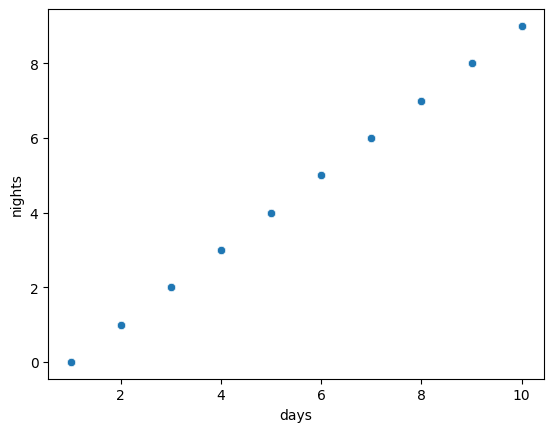

In [187]:
# is the 'nights' column necessary?
sns.scatterplot(data=df, x='days', y='nights')

In [188]:
df.rename(columns={'total_price_final_y':'total_price_final'}, inplace=True)

## Basic funnel analysis for an overview

In [189]:
# hotel 1
hotel1 = df[df['hotel_id']=='hotel_1'].drop(columns='hotel_id').copy()
hotel1['utc_datetime'] = pd.to_datetime(hotel1['utc_datetime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
hotel1 = hotel1[hotel1['utc_datetime'] > '2024-09-17'].copy()
# keep the uniqe users
hotel1.drop_duplicates(subset='uuid', keep='last', inplace=True)  # there are some guests, who booked rooms several times (61 pieces in total). I keep the last booking

# hotel 2
hotel2 = df[df['hotel_id']=='hotel_2'].drop(columns='hotel_id').copy()
hotel2['utc_datetime'] = pd.to_datetime(hotel2['utc_datetime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
hotel2 = hotel2[hotel2['utc_datetime'] > '2024-09-17'].copy()
# keep the uniqe users
hotel2.drop_duplicates(subset='uuid', keep='last', inplace=True)  # there are some guests, who booked rooms several times (61 pieces in total). I keep the last booking

# hotel 3
hotel3 = df[df['hotel_id']=='hotel_3'].drop(columns='hotel_id').copy()
hotel3['utc_datetime'] = pd.to_datetime(hotel3['utc_datetime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
hotel3 = hotel3[hotel3['utc_datetime'] > '2024-09-17'].copy()
# keep the uniqe users
hotel3.drop_duplicates(subset='uuid', keep='last', inplace=True)  # there are some guests, who booked rooms several times (61 pieces in total). I keep the last booking

In [190]:
funnel1 = list()
funnel1.append(len(hotel1))
funnel1.append(len(hotel1[(hotel1[['ROOMAA_room_price_min','ROOMBB_room_price_min','ROOMCC_room_price_min','ROOMDD_room_price_min','ROOMEE_room_price_min','ROOMFF_room_price_min','ROOMGG_room_price_min','ROOMHH_room_price_min']].notna().sum(axis=1))>0])) # where there was at least 1 offered room
funnel1.append((hotel1['conversion']==1).sum())

In [191]:
funnel2 = list()
funnel2.append(len(hotel2))
funnel2.append(len(hotel2[(hotel2[['ROOMAA_room_price_min','ROOMBB_room_price_min','ROOMCC_room_price_min','ROOMDD_room_price_min','ROOMEE_room_price_min','ROOMFF_room_price_min','ROOMGG_room_price_min','ROOMHH_room_price_min']].notna().sum(axis=1))>0]))
funnel2.append((hotel2['conversion']==1).sum())

In [192]:
funnel3 = list()
funnel3.append(len(hotel3))
funnel3.append(len(hotel3[(hotel3[['ROOMAA_room_price_min','ROOMBB_room_price_min','ROOMCC_room_price_min','ROOMDD_room_price_min','ROOMEE_room_price_min','ROOMFF_room_price_min','ROOMGG_room_price_min','ROOMHH_room_price_min']].notna().sum(axis=1))>0]))
funnel3.append((hotel3['conversion']==1).sum())

In [193]:
(np.array(funnel1)/len(hotel1))

array([1.        , 0.93153406, 0.07033532])

[Text(0, 0, 'Mean:\n100.00'),
 Text(0, 0, 'Mean:\n93.70'),
 Text(0, 0, 'Mean:\n4.88')]

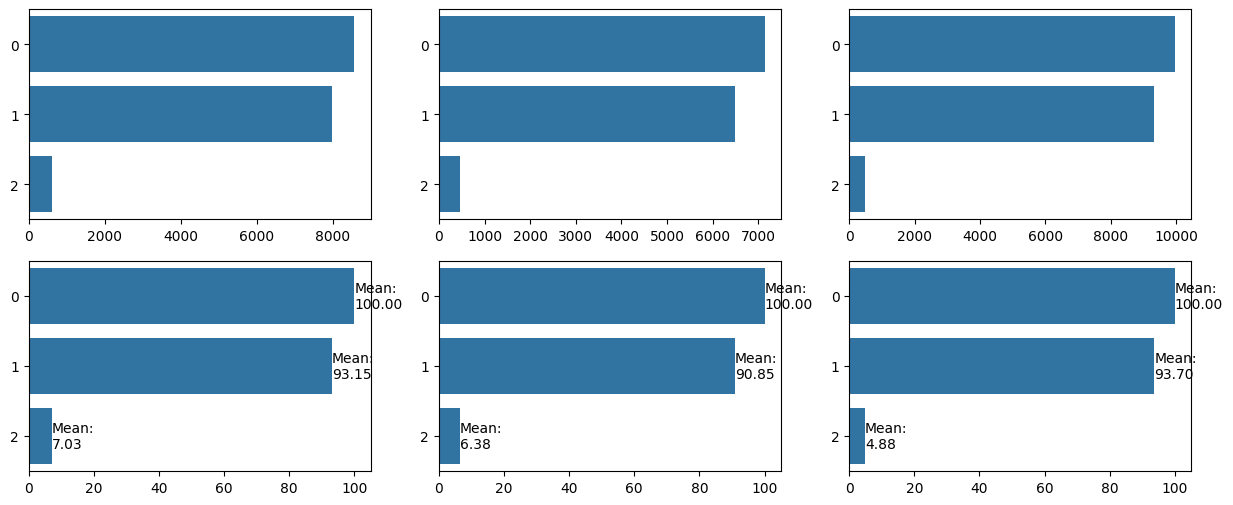

In [194]:
fig, ((ax11, ax12, ax13), (ax21, ax22, ax23)) = plt.subplots(2, 3, figsize=(15,6))
sns.barplot(ax=ax11, y=np.arange(len(funnel1)), x=funnel1 , orient='h')
sns.barplot(ax=ax12, y=np.arange(len(funnel2)), x=funnel2, orient='h')
sns.barplot(ax=ax13, y=np.arange(len(funnel3)), x=funnel3, orient='h')

sns.barplot(ax=ax21, y=np.arange(len(funnel1)), x=(np.array(funnel1)/len(hotel1))*100 , orient='h').bar_label(ax21.containers[-1], fmt='Mean:\n%.2f', label_type='edge')
sns.barplot(ax=ax22, y=np.arange(len(funnel2)), x=(np.array(funnel2)/len(hotel2))*100, orient='h').bar_label(ax22.containers[-1], fmt='Mean:\n%.2f', label_type='edge')
sns.barplot(ax=ax23, y=np.arange(len(funnel3)), x=(np.array(funnel3)/len(hotel3))*100, orient='h').bar_label(ax23.containers[-1], fmt='Mean:\n%.2f', label_type='edge')

# 1: datepicker unique visitors
# 2: room offered
# 3: booked

### Time-delay between the first datepicker visit and then the booking

In [195]:
# calculate the time difference between the first visit and the booking

return_time = []
for hotel_num in ['hotel_1', 'hotel_2', 'hotel_3']:
    for index, row in df[df['uuid'].duplicated(keep='first') & (df['conversion'] == 1) & (df['hotel_id']==hotel_num)]['uuid'].items():
    
        i_first = df[df['uuid'].duplicated(keep=False) & (df['hotel_id']==hotel_num) & (df['uuid']==row)]['uuid'].index[0]
        i_last = df[df['uuid'].duplicated(keep=False) & (df['hotel_id']==hotel_num) & (df['uuid']==row)]['uuid'].index[-1]

        return_time.append({
            'uuid': row,
            'first_visit': df.loc[i_first, 'utc_datetime'],
            'last_visit': df.loc[i_last, 'utc_datetime'],
            'hotel_id': hotel_num
        })
    
return_time = pd.DataFrame(return_time)

In [196]:
return_time['time_diff'] = (pd.to_datetime(return_time['last_visit'], format='%Y-%m-%d %H:%M:%S') - pd.to_datetime(return_time['first_visit'], format='%Y-%m-%d %H:%M:%S')).dt.total_seconds() / 3600 # in hours

<Axes: ylabel='Frequency'>

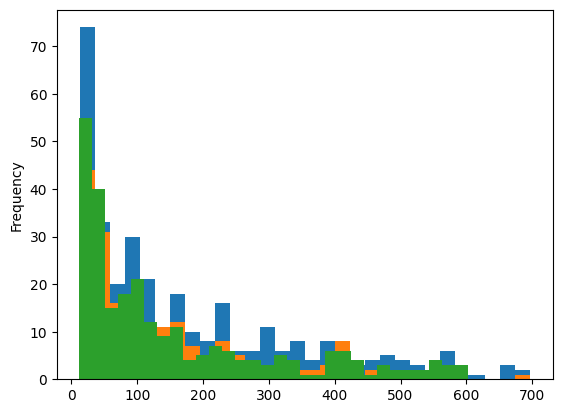

In [197]:
return_time[(return_time['hotel_id']=='hotel_1') & (return_time['time_diff']>12)]['time_diff'].plot(kind='hist', bins=30)
return_time[(return_time['hotel_id']=='hotel_2') & (return_time['time_diff']>12)]['time_diff'].plot(kind='hist', bins=30)
return_time[(return_time['hotel_id']=='hotel_3') & (return_time['time_diff']>12)]['time_diff'].plot(kind='hist', bins=30)

<Axes: xlabel='total_price_final', ylabel='picked_price_median'>

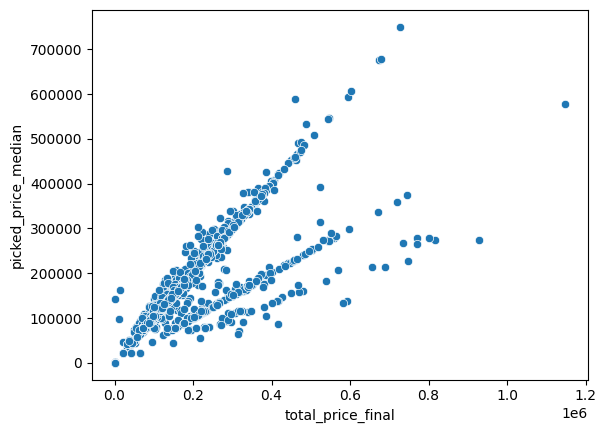

In [198]:
sns.scatterplot(data=df, x='total_price_final' ,y='picked_price_median')

<Axes: xlabel='total_price_final', ylabel='rooms_total_price'>

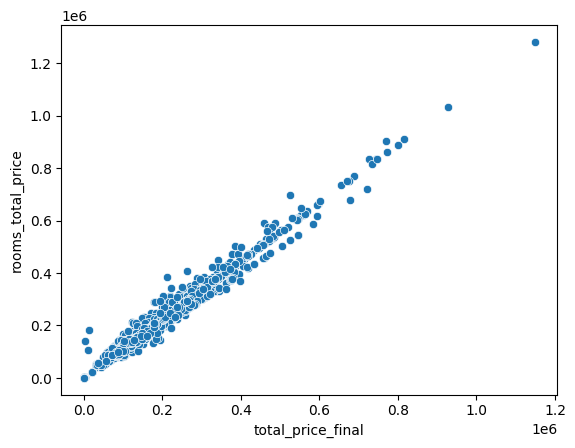

In [199]:
sns.scatterplot(data=df, x='total_price_final' ,y='rooms_total_price')


In [200]:
# currency conversion

# ccrape down the EUR exchange rate data from MNB's webpage

import requests
from bs4 import BeautifulSoup

# Define the URL
url = 'https://www.mnb.hu/arfolyam-tablazat?deviza=rbCurrencyActual&devizaSelected=EUR&datefrom=2024.09.17.&datetill=2024.10.18.&order=1'

# Fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table') 

# rows into a table
table_data = []
for row in table.find_all('tr'):
    cells = row.find_all(['td', 'th'])
    table_data.append([cell.get_text(strip=True) for cell in cells])

eur_price = pd.DataFrame(table_data[1:], columns=table_data[0])  # first row to header

eur_price = eur_price.drop(index=[0,1]).reset_index()

eur_price = eur_price.rename(columns={'':'date'})[['date','EUR']]

In [201]:
# dates to YYYY-MM-DD format

hungarian_to_english = {
    'január': 'January', 'február': 'February', 'március': 'March', 'április': 'April',
    'május': 'May', 'június': 'June', 'július': 'July', 'augusztus': 'August',
    'szeptember': 'September', 'október': 'October', 'november': 'November', 'december': 'December',
    'hétfő': 'Monday', 'kedd': 'Tuesday', 'szerda': 'Wednesday', 'csütörtök': 'Thursday',
    'péntek': 'Friday', 'szombat': 'Saturday', 'vasárnap': 'Sunday'
}

def convert_hungarian_date(date_str):
    for hun, eng in hungarian_to_english.items():
        date_str = date_str.replace(hun, eng)
    date_obj = datetime.strptime(date_str, '%Y. %B %d., %A')
    return date_obj.strftime('%Y-%m-%d')

# apply the function to the df column
eur_price['date'] = eur_price['date'].apply(convert_hungarian_date)

In [202]:
eur_price['date'] = pd.to_datetime(eur_price['date'])

In [203]:
# Convert date column to datetime and value column to numeric
eur_price.set_index('date', inplace=True)

# Create a complete date range from the first to the last date
date_range = pd.date_range(start=eur_price.index.min(), end=eur_price.index.max(), freq='D')

# Reindex the DataFrame to include all dates in the range
eur_price = eur_price.reindex(date_range)

In [204]:
eur_price['EUR'] = eur_price['EUR'].fillna(method='ffill')

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_20037/2358788950.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  eur_price['EUR'] = eur_price['EUR'].fillna(method='ffill')


In [205]:
def conversion(x):
    rate = eur_price[eur_price.index == x]['EUR'].values
    if rate:
        return float(rate[0].replace(',', '.')) 
    else:
        return None

In [206]:
df['simple_date'] = pd.to_datetime(df['utc_datetime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')

In [207]:
# Set the default conversion rate to 1
df['conversion_rate'] = 1

# Update 'conversion_rate' only where 'currency' is 'EUR'
df.loc[df['currency'] == 'EUR', 'conversion_rate'] = df.loc[df['currency'] == 'EUR', 'simple_date'].apply(conversion)

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_20037/3567221939.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[394.27 394.27 394.47 ... 400.05 400.05 400.05]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['currency'] == 'EUR', 'conversion_rate'] = df.loc[df['currency'] == 'EUR', 'simple_date'].apply(conversion)


In [208]:
df['total_price_final'] = df['conversion_rate']*df['total_price_final']
df['rooms_total_price'] = df['conversion_rate']*df['rooms_total_price']
df['upsell_total_price'] = df['conversion_rate']*df['upsell_total_price']
df['vouchers_total_price'] = df['conversion_rate']*df['vouchers_total_price']
df['loyalty_discount_total'] = df['conversion_rate']*df['loyalty_discount_total']
df['picked_price_median'] = df['conversion_rate']*df['picked_price_median']

In [209]:
df.drop(columns=['conversion_rate', 'simple_date'], inplace=True)

In [210]:
# new column, if_children = 1, if children included
df['if_children'] = 0
df['if_children'].loc[df['children'] > 0] = 1

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_20037/1183189788.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['if_children'].loc[df['children'] > 0] = 1
/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_20037/11

In [224]:
# new_column = picked_room_price/night

df['picked_price_p_night'] = df['picked_price_median']/df['nights']

In [225]:
df.drop(columns='days', inplace=True)

KeyError: "['days'] not found in axis"

In [226]:
# rearrange columns

df = df[['search_log_session_id', 'search_log_id', 'session_id', 'uuid', 'utc_datetime', 'utm_source',
   'utm_medium', 'utm_campaign','lang_code', 'currency', 'arrival', 'departure', 'nights',
    'adults', 'children', 'conversion', 'search_log_room_id',
    'sel_num_of_rooms', 'picked_price_median', 'picked_price_p_night','picked_room', '0_age',
    '1_age', '2_age', '3_age', '4_age', 'baby_bed', 'pieces', 'sum_price', 'total_price_final',
    'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
    'loyalty_discount_total', 'redeemed_loyalty_points_total', 'hotel_id', 'ROOMAA_room_price_min',
    'ROOMAA_room_price_max', 'ROOMBB_room_price_min','ROOMBB_room_price_max', 'ROOMCC_room_price_min',
    'ROOMCC_room_price_max', 'ROOMDD_room_price_min','ROOMDD_room_price_max', 'ROOMEE_room_price_min',
    'ROOMEE_room_price_max', 'ROOMFF_room_price_min','ROOMFF_room_price_max', 'ROOMGG_room_price_min',
    'ROOMGG_room_price_max', 'ROOMHH_room_price_min','ROOMHH_room_price_max']]

In [238]:
print(str(df['nights'].mean()) + ', '+ str(df['nights'].std()))

2.4905803864634106, 1.0498191099852285


In [241]:
# RFM segmentation, based on: picked_price_median, days
# define segment boundaries based low duration = mean-1*std, medium duration = mean+-1*std, long duration = mean+1*std

df['rfm_monetary_score'] = pd.qcut(df['picked_price_p_night'], 4, labels=False)
df['rfm_duration_score'] = pd.cut(df['nights'], bins=[min(df['nights'])] + list([2, 4]) + [max(df['nights'])], labels=['1','2-3','4-9'] ,right=True)

In [242]:
df['picked_price_p_night'].quantile([0.25, 0.5, 0.75])

0.25    47750.708333
0.50    60515.500000
0.75    79605.188267
Name: picked_price_p_night, dtype: float64

In [243]:
hotel1 = df[df['hotel_id']=='hotel_1'].drop(columns='hotel_id').copy()
hotel2 = df[df['hotel_id']=='hotel_2'].drop(columns='hotel_id').copy()
hotel3 = df[df['hotel_id']=='hotel_3'].drop(columns='hotel_id').copy()

# Segmentation

- what user group is more likely to book a room?
- what groups can be separated?
- what are the most important variables for segmentation?

### RFM

<Axes: xlabel='nights', ylabel='Count'>

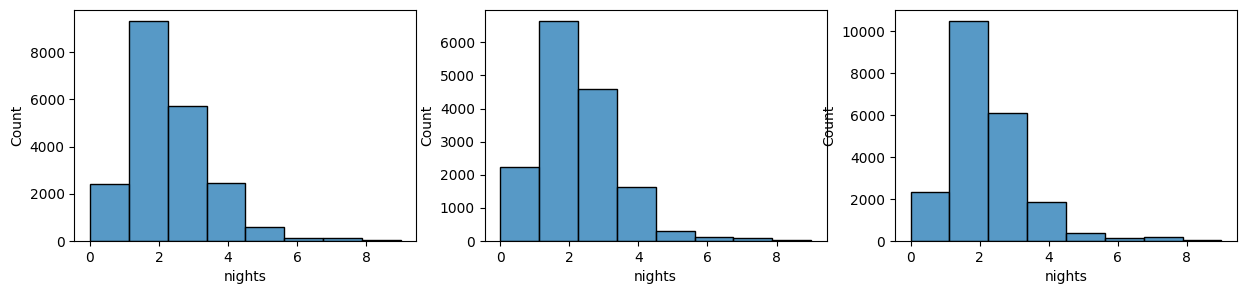

In [222]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
sns.histplot(ax=ax1, data=hotel1, x='nights', bins=8)
sns.histplot(ax=ax2, data=hotel2, x='nights', bins=8)
sns.histplot(ax=ax3, data=hotel3, x='nights', bins=8)

<Axes: xlabel='nights', ylabel='picked_price_p_night'>

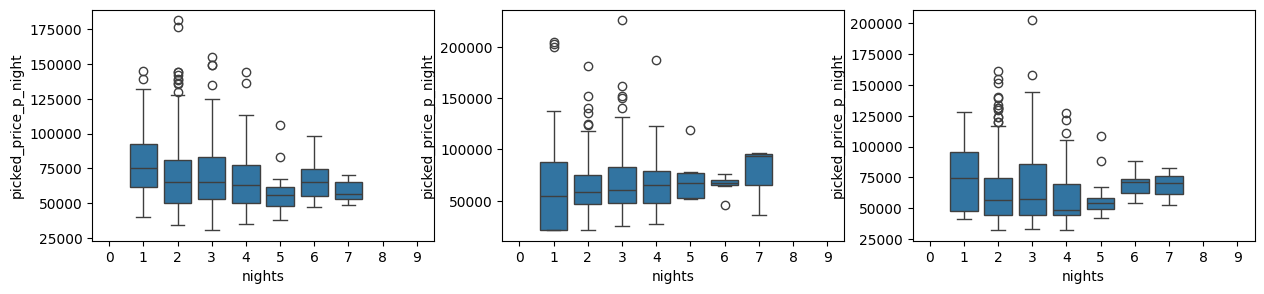

In [228]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
sns.boxplot(ax=ax1, data=hotel1, x ='nights', y='picked_price_p_night')
sns.boxplot(ax=ax2, data=hotel2, x ='nights', y='picked_price_p_night')
sns.boxplot(ax=ax3, data=hotel3, x ='nights', y='picked_price_p_night')

<Axes: xlabel='picked_price_p_night', ylabel='Count'>

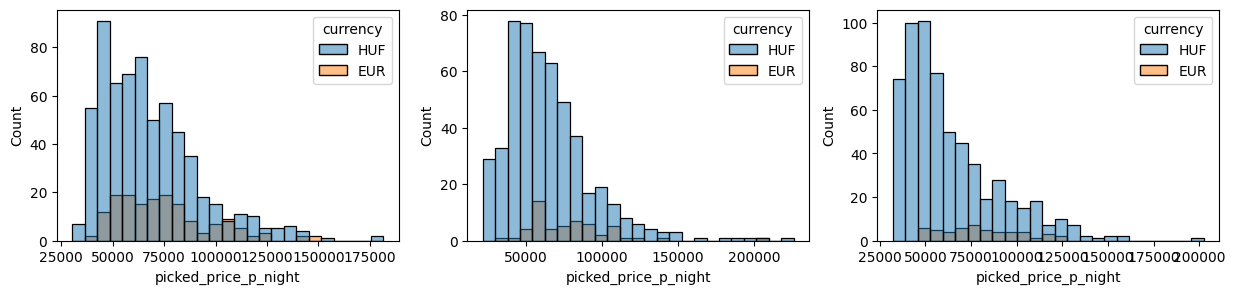

In [230]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
sns.histplot(ax=ax1, data=hotel1, x='picked_price_p_night', bins=25, hue='currency')
sns.histplot(ax=ax2, data=hotel2, x='picked_price_p_night', bins=25, hue='currency')
sns.histplot(ax=ax3, data=hotel3, x='picked_price_p_night', bins=25, hue='currency')  #lognorm distribution

In [124]:
hotel1.columns

Index(['search_log_session_id', 'search_log_id', 'session_id', 'uuid',
       'utc_datetime', 'utm_source', 'utm_medium', 'utm_campaign', 'lang_code',
       'currency', 'arrival', 'departure', 'days', 'adults', 'children',
       'conversion', 'search_log_room_id', 'sel_num_of_rooms',
       'picked_price_median', 'picked_room', '0_age', '1_age', '2_age',
       '3_age', '4_age', 'baby_bed', 'pieces', 'sum_price',
       'total_price_final', 'rooms_total_price', 'upsell_total_price',
       'vouchers_total_price', 'loyalty_discount_total',
       'redeemed_loyalty_points_total', 'ROOMAA_room_price_min',
       'ROOMAA_room_price_max', 'ROOMBB_room_price_min',
       'ROOMBB_room_price_max', 'ROOMCC_room_price_min',
       'ROOMCC_room_price_max', 'ROOMDD_room_price_min',
       'ROOMDD_room_price_max', 'ROOMEE_room_price_min',
       'ROOMEE_room_price_max', 'ROOMFF_room_price_min',
       'ROOMFF_room_price_max', 'ROOMGG_room_price_min',
       'ROOMGG_room_price_max', 'ROOMHH_room_p

In [244]:
hotel1[['uuid','adults', 'children', 'if_children', 'conversion','sel_num_of_rooms','picked_price_median','0_age', '1_age', '2_age',
       '3_age', '4_age', 'baby_bed', 'upsell_total_price',
       'vouchers_total_price', 'loyalty_discount_total','redeemed_loyalty_points_total',
       'rfm_duration_score']].drop_duplicates(subset='uuid', keep='last').drop(columns='uuid').groupby(by='rfm_duration_score').mean().style.format('{0:,.2f}').bar(color='#d65f5f')

KeyError: "['if_children'] not in index"

In [137]:
hotel1[['picked_price_median','rfm_duration_score']].groupby(by='rfm_duration_score').median()

/var/folders/w_/802pn39d4f75d8__y1zs9yxm0000gn/T/ipykernel_20037/2498767073.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hotel1[['picked_price_median','rfm_duration_score']].groupby(by='rfm_duration_score').median()


,picked_price_median
rfm_duration_score,
1-2,66591.5
3-4,131544.0
5-10,188496.0


In [ ]:
# mennyi időre előre keresnek szállást?
# offered room közül melyiket választják?
# EUR - HUF átváltás, de EUR oszlopt megtartani, az alapján különválasztani, kik költöttek többet
# mennyi az offered price range, és abból melyiket választották

# melyek a nem eredményes kampányok, és miért?
# akik keresnek, mit keresnek?
# milyen időszakokat keresnek?
# mi az oka, hogy egy időszakot nagyon keresnek, de aztán nem foglalnak?